In [1]:
%run flow_tools.py

In [2]:
folder= box_dir + "BadIdea/Flow/20210210 - PTV 24hr/"

In [3]:
df = load_data(folder, colnames=["WellName", "CellLine","Condition", 'Replicate'])
df2 = clean_data(df)

In [4]:
df2.loc[df2['CellLine'] == 'LCB1-Notch', 'CellLine'] = 'SARSNotch'

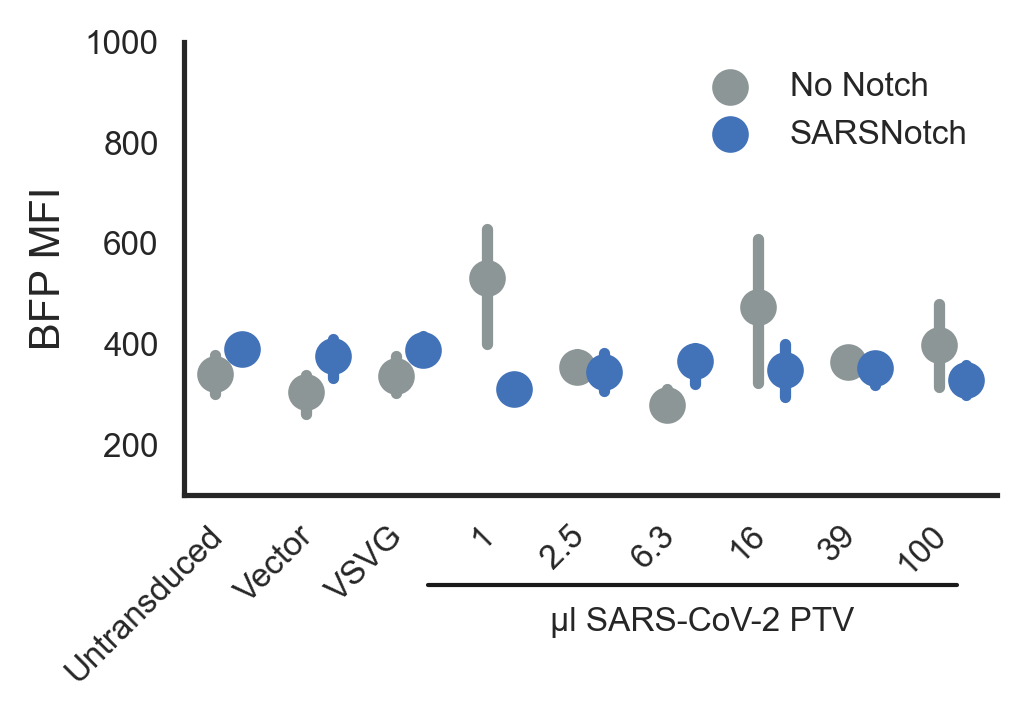

In [5]:
activated = (df2
 .groupby(['CellLine','Condition','Replicate'])['BV 421-A']
 .mean()
 .reset_index())

with sns.color_palette(['#8C9696','#4272B8']):
    plt.figure(figsize=(3.5,2), dpi=300)
    g = sns.pointplot(data=activated, x='Condition', y='BV 421-A', hue='CellLine',
                      order=['Untransduced', 'Vector', 'VSVG', '1','2.5', '6.3', '16','39','100'],
                      hue_order=['No Notch', 'SARSNotch'],
                      join=False,
                      dodge=0.3)
    plt.xticks(rotation=45, ha='right')
    line = mpl.lines.Line2D([0.3, 0.95],[-.2, -.2], 
                            lw=1, color='k', clip_on=False, 
                            transform=g.axes.transAxes)
    g.axes.add_line(line)
    g.axes.text(0.45, -.3, 'µl SARS-CoV-2 PTV', 
                clip_on=False, transform=g.axes.transAxes)
    g.legend().remove()
    plt.legend(frameon=False)
    plt.xlabel('')
    plt.ylim([100, 1000])
    plt.ylabel('BFP MFI')
    sns.despine()
    plt.savefig(outputdir + "activation_ptv_24.svg", bbox_inches='tight')